In [1]:
import pandas as pd

In [2]:
column_names = ["classes", "cap shape", "cap surface", "cap color", "bruise", "odor",
                "gill attachment", "gill spacing", "gill size", "gill color", 
                "stalk shape", "stalk root", "stalk surface above ring", "stalk surface below ring",
                "stalk color above ring", "stalk color below ring", "veil type", 
                "veil color", "ring number", "ring type", "spore print color", 
                "population", "habitat"]
mushroom = pd.read_csv("agaricus-lepiota.data", names = column_names, header = None)
mushroom.head()

,classes,cap shape,cap surface,cap color,bruise,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


0. classes: edible=e, poisonous=p
1. cap shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
2. cap surface: fibrous=f, grooves=g, scaly=y, smooth=s
3. cap color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
4. bruises?: bruises=t, no=f
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
6. gill attachment: attached=a, descending=d, free=f, notched=n
7. gill spacing: close=c, crowded=w, distant=d
8. gill size: broad=b, narrow=n
9. gill color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
10. stalk shape: enlarging=e, tapering=t
11. stalk root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
12. stalk surface above ring: fibrous=f, scaly=y, silky=k, smooth=s
13. stalk surface below ring: fibrous=f, scaly=y, silky=k, smooth=s
14. stalk color above ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
15. stalk color below ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
16. veil type: partial=p, universal=u
17. veil color: brown=n, orange=o, white=w, yellow=y
18. ring number: none=n, one=o, two=t
19. ring type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
20. spore print color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [3]:
# create a dictionary to convert letters in columns into something more meaningful

attributes = {"classes": {"p": "poisonous", "e": "edible"},
              "cap shape": {"b": "bell", "c": "conical", "x": "convex", "f": "flat","k": "knobbed", "s": "sunken"},
              "cap surface" : {"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"},
              "cap color": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green", "p": "pink", 
                            "u": "purple","e": "red", "w": "white", "y": "yellow"},
              "bruise": {"t": "true", "f": "false"},
              "odor": {"a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul", "m": "musty", 
                       "n": "none", "p": "pungent", "s": "spicy"},
              "gill attachment": {"a": "attached", "d": "descending", "f": "free", "n": "notched"},
              "gill spacing": {"c": "close", "w": "crowded", "d": "distant"},
              "gill size": {"b": "broad", "n": "narrow"},
              "gill color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray", 
                             "r": "green", "o": "orange", "p": "pink", "u": "purple", "e": "red", 
                             "w": "white", "y": "yellow"},
              "stalk shape": {"e": "enlarging", "t": "tapering"},
              "stalk root": {"b": "bulbous", "c": "club", "u": "cup", "e": "equal", "z": "rhizomorphs", 
                             "r": "rooted", "?": "missing"},
              "stalk surface above ring": {"f": "fibrous","y": "scaly", "k": "silky", "s": "smooth"},
              "stalk surface below ring":{"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
              "stalk color above ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", 
                                         "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
              "stalk color below ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", 
                                         "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
              "veil type": {"p": "partial", "u": "universal"},
              "veil color": {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},
              "ring number": {"n": "none", "o": "one", "t": "two"},
              "ring type": {"c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large", "n": "none",
                            "p": "pendant", "s": "sheathing", "z": "zone"},
              "spore print color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "r": "green",
                                    "o": "orange", "u": "purple", "w": "white", "y": "yellow"},
              "population": {"a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered", 
                             "v": "several", "y": "solitary"},
              "habitat": {"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "u": "urban", 
                          "w": "waste", "d": "woods"}
             }

In [4]:
# loop through columns and map them
for col in mushroom.columns:
    mushroom[col] = mushroom[col].map(attributes[col])

In [5]:
mushroom.shape

(8124, 23)

In [6]:
mushroom.isnull().sum()

classes                     0
cap shape                   0
cap surface                 0
cap color                   0
bruise                      0
odor                        0
gill attachment             0
gill spacing                0
gill size                   0
gill color                  0
stalk shape                 0
stalk root                  0
stalk surface above ring    0
stalk surface below ring    0
stalk color above ring      0
stalk color below ring      0
veil type                   0
veil color                  0
ring number                 0
ring type                   0
spore print color           0
population                  0
habitat                     0
dtype: int64

In [7]:
mushroom.duplicated().sum()

0

In [8]:
mushroom.describe()

,classes,cap shape,cap surface,cap color,bruise,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,false,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
mushroom.nunique(axis = 0)

classes                      2
cap shape                    6
cap surface                  4
cap color                   10
bruise                       2
odor                         9
gill attachment              2
gill spacing                 2
gill size                    2
gill color                  12
stalk shape                  2
stalk root                   5
stalk surface above ring     4
stalk surface below ring     4
stalk color above ring       9
stalk color below ring       9
veil type                    1
veil color                   4
ring number                  3
ring type                    5
spore print color            9
population                   6
habitat                      7
dtype: int64

In [10]:
mushroom["classes"].value_counts()

edible       4208
poisonous    3916
Name: classes, dtype: int64

In [11]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   object
 1   cap shape                 8124 non-null   object
 2   cap surface               8124 non-null   object
 3   cap color                 8124 non-null   object
 4   bruise                    8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill attachment           8124 non-null   object
 7   gill spacing              8124 non-null   object
 8   gill size                 8124 non-null   object
 9   gill color                8124 non-null   object
 10  stalk shape               8124 non-null   object
 11  stalk root                8124 non-null   object
 12  stalk surface above ring  8124 non-null   object
 13  stalk surface below ring  8124 non-null   object
 14  stalk color above ring  

In [12]:
#from dataprep.eda import plot
#plot(mushroom)

In [13]:
#!pip install mplcursors

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline
#%matplotlib widget
#%matplotlib nbagg
#import mplcursors

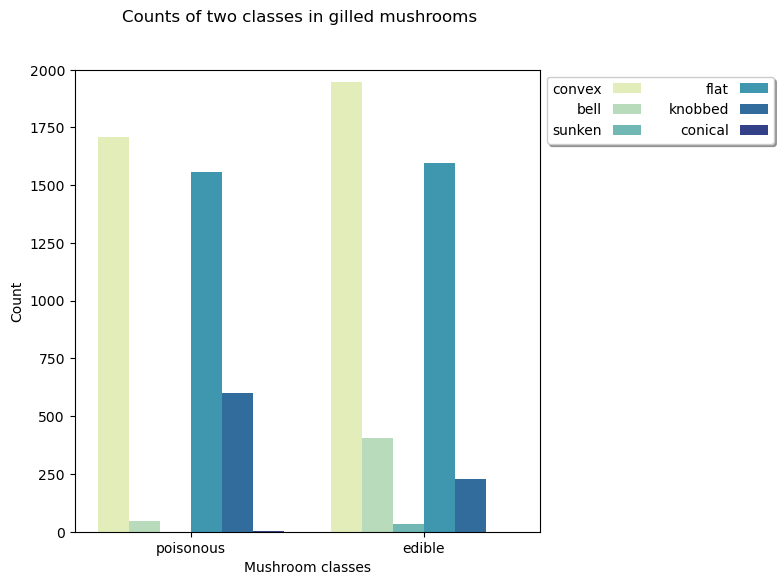

In [17]:
fig, axes = plt.subplots(figsize = (6, 6))
fig.suptitle("Counts of two classes in gilled mushrooms")
#sns.set_theme(style="whitegrid")
sns.countplot(ax = axes, data = mushroom, x = "classes", 
              linewidth = 3, hue = "cap shape", palette = "YlGnBu")
axes.set_xlabel("Mushroom classes")
axes.set_ylabel("Count")
plt.legend(#title = "classes", 
           #labels = ["edible", "poisonous"], 
           bbox_to_anchor = (1, 1), 
           frameon = True, 
           ncol = 2,
           markerfirst = False,
           shadow = True)
plt.ylim(0, 2000)
plt.show()